In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# read csv
df=pd.read_csv('./data/combined_output_3.csv', sep=';')
# drop incomplete rows
df = df.dropna()
# drop CID column
df = df.drop(columns=['CID'])
df

,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount
1,418.60,4.7,1,5
2,308.80,2.1,0,3
3,203.24,0.4,0,4
4,204.24,-0.3,1,4
5,156.14,-0.3,3,4
...,...,...,...,...
577,1093.30,0.3,16,18
578,390.22,-0.1,2,4
579,1239.40,-0.1,15,15
580,1431.00,1.9,16,16


In [3]:
# convert to numpy array
X = df.to_numpy()
X.shape

(573, 4)

# TSNE

In [4]:
# TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded

array([[ 28.133774  ,   7.789986  ],
       [ 11.035577  ,  10.145371  ],
       [ -0.25597546,  -7.662623  ],
       ...,
       [ 40.029636  , -12.257287  ],
       [ 40.196156  , -13.464779  ],
       [ 36.569286  ,  -3.8200138 ]], dtype=float32)

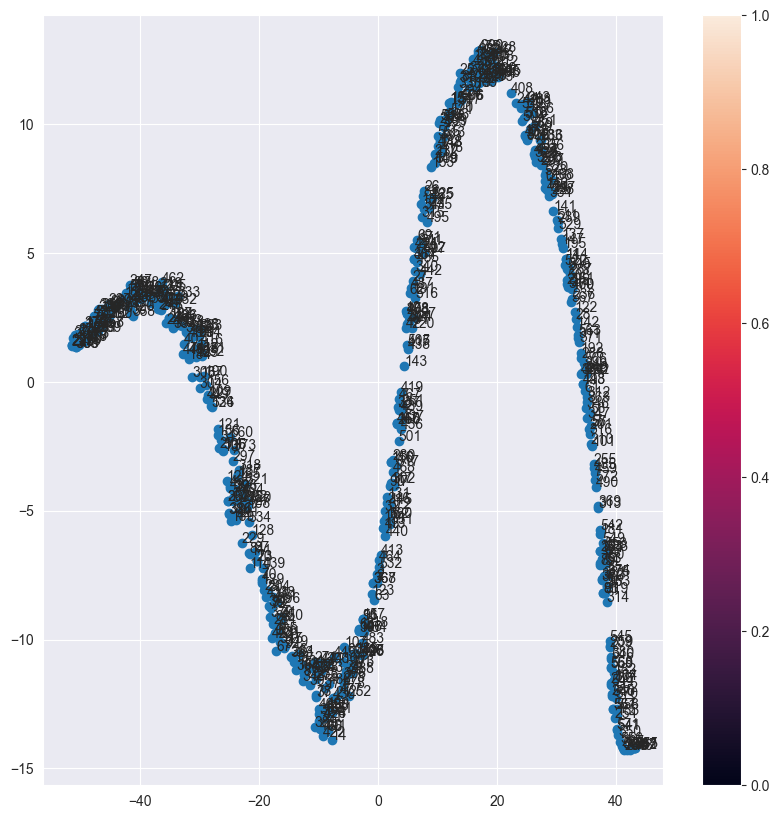

In [5]:
#plot results of TSNE
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
for i in range(X_embedded.shape[0]):
    plt.text(X_embedded[i,0], X_embedded[i,1], str(i))
plt.colorbar()
plt.show()


# DBSCAN

In [6]:
db = DBSCAN(eps=1, min_samples=2).fit(X_embedded)
labels = db.labels_

In [7]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 18
Estimated number of noise points: 2


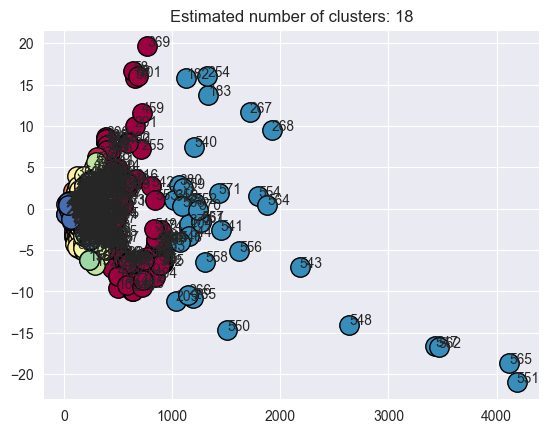

In [8]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    # Add descriptions for each sample
    for i, (x, y) in enumerate(zip(X[:, 0], X[:, 1])):
        if labels[i] == k:
            plt.text(x, y, i, fontsize=10)

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# KMeans

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_embedded)
labels = kmeans.predict(X_embedded)

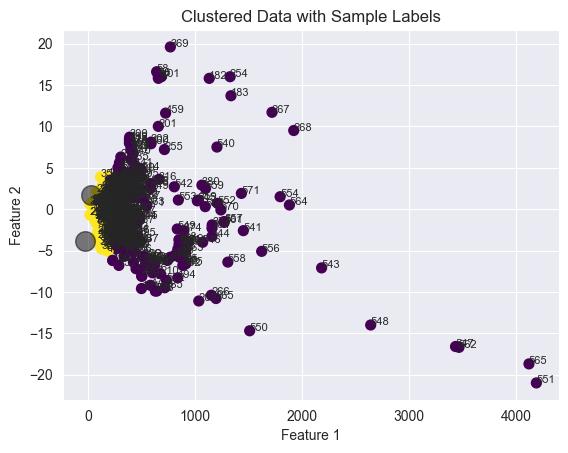

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# Add descriptions for each sample
for i, (x, y) in enumerate(zip(X[:, 0], X[:, 1])):
    plt.text(x, y, i, fontsize=8)

plt.title("Clustered Data with Sample Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [11]:
# get data from each cluster
cluster_map = pd.DataFrame(X)
cluster_map['cluster'] = labels

### Cluster 0

In [12]:
# add cluster number to the original dataframe
df['cluster'] = labels
#add cid column back
df['CID'] = pd.read_csv('./data/combined_output.csv', sep=';')['CID']
#add column names back
# get cluster 0
df_cluster_0 = df[df['cluster'] == 0]
df_cluster_0.to_csv('./data/cluster_0.csv', sep=';')
df_cluster_0


,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
1,418.60,4.7,1,5,0,2118.0
2,308.80,2.1,0,3,0,54678486.0
3,203.24,0.4,0,4,0,3961.0
4,204.24,-0.3,1,4,0,3016.0
8,202.55,2.3,0,4,0,110635.0
...,...,...,...,...,...,...
577,1093.30,0.3,16,18,0,NaN
578,390.22,-0.1,2,4,0,NaN
579,1239.40,-0.1,15,15,0,NaN
580,1431.00,1.9,16,16,0,NaN


### Cluster 1

In [13]:
df_cluster_1 = df[df['cluster'] == 1]
df_cluster_1.to_csv('./data/cluster_1.csv', sep=';')
df_cluster_1


,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
5,156.14,-0.3,3,4,1,2771.0
6,75.11,-1.0,2,2,1,2160.0
7,169.07,-5.0,3,6,1,5755.0
9,163.18,0.2,1,4,1,446157.0
10,148.16,-0.4,3,4,1,444.0
...,...,...,...,...,...,...
533,138.12,2.3,2,3,1,NaN
540,180.16,1.2,1,4,1,NaN
542,129.16,-1.3,3,1,1,NaN
543,151.16,0.5,2,2,1,NaN


# Radar chart (Source data)

In [14]:
theta = df.columns.values
rescale_vector=np.array([0.01, 1, 1, 1])
X_rescaled = X*rescale_vector
X_rescaled

array([[ 4.186 ,  4.7   ,  1.    ,  5.    ],
       [ 3.088 ,  2.1   ,  0.    ,  3.    ],
       [ 2.0324,  0.4   ,  0.    ,  4.    ],
       ...,
       [12.394 , -0.1   , 15.    , 15.    ],
       [14.31  ,  1.9   , 16.    , 16.    ],
       [ 7.307 , -8.6   , 12.    , 20.    ]])

In [15]:
fig_0 = go.Figure(
    data=[go.Scatterpolar(r=row, theta=theta) for row in X_rescaled],
        layout=go.Layout(
        title=go.layout.Title(text='All compounds'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_0, filename = 'fig_0.html')

'fig_0.html'

In [16]:
# get clustered substances and create bounding boxes based on kmeans and the other one
# plot just these two

# Radar + KMeans

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.predict(X)
# get data from each cluster
cluster_map = pd.DataFrame(X)
cluster_map['cluster'] = labels
cluster_map

,0,1,2,3,cluster
0,418.60,4.7,1.0,5.0,1
1,308.80,2.1,0.0,3.0,1
2,203.24,0.4,0.0,4.0,1
3,204.24,-0.3,1.0,4.0,1
4,156.14,-0.3,3.0,4.0,1
...,...,...,...,...,...
568,1093.30,0.3,16.0,18.0,0
569,390.22,-0.1,2.0,4.0,1
570,1239.40,-0.1,15.0,15.0,0
571,1431.00,1.9,16.0,16.0,0


In [18]:
# get cluster 0
cluster_0 = cluster_map[cluster_map['cluster'] == 0]
cluster_0

,0,1,2,3,cluster
53,867.7,-5.4,10.0,23.0,0
54,865.6,-5.2,9.0,23.0,0
55,851.7,-4.2,9.0,22.0,0
75,851.6,-5.8,9.0,23.0,0
85,911.7,-6.6,11.0,25.0,0
89,853.6,-5.8,10.0,23.0,0
91,911.7,-6.5,11.0,25.0,0
95,909.6,-6.4,10.0,25.0,0
100,849.6,-4.2,9.0,22.0,0
104,1156.1,-2.3,11.0,25.0,0


In [19]:
# get cluster 1
cluster_1 = cluster_map[cluster_map['cluster'] == 1]
cluster_1

,0,1,2,3,cluster
0,418.60,4.7,1.0,5.0,1
1,308.80,2.1,0.0,3.0,1
2,203.24,0.4,0.0,4.0,1
3,204.24,-0.3,1.0,4.0,1
4,156.14,-0.3,3.0,4.0,1
...,...,...,...,...,...
563,541.60,0.5,4.0,10.0,1
566,577.70,3.1,3.0,7.0,1
567,508.60,1.3,5.0,8.0,1
569,390.22,-0.1,2.0,4.0,1


In [20]:
# plot radar chart for cluster 0
cluster_0_rescaled = cluster_0.drop(columns=['cluster']).to_numpy()*rescale_vector
fig_1 = go.Figure(
    data=[go.Scatterpolar(r=row, theta=theta) for row in cluster_0_rescaled],
        layout=go.Layout(
        title=go.layout.Title(text='Cluster 0 compounds'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_1, filename = 'fig_1.html')
fig_1.write_image('./fig_1.png')

![alt text](./fig_1.png)

In [21]:
# plot radar chart for cluster 1
cluster_1_rescaled = cluster_1.drop(columns=['cluster']).to_numpy()*rescale_vector
fig_2 = go.Figure(
    data=[go.Scatterpolar(r=row, theta=theta) for row in cluster_1_rescaled],
        layout=go.Layout(
        title=go.layout.Title(text='Cluster 1 compounds'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_2, filename = 'fig_2.html')
fig_2.write_image('./fig_2.png')

![alt text](./fig_2.png)

## Cluster 1 radar chart


In [22]:
# bounding box for cluster 0
cluster_0_min = cluster_0.drop(columns=['cluster']).min().values
cluster_0_max = cluster_0.drop(columns=['cluster']).max().values
# plot bounding box for cluster 0
fig_3 = go.Figure(
    data=[go.Scatterpolar(r=cluster_0_min*rescale_vector, theta=theta, mode='lines', name='min'),
          go.Scatterpolar(r=cluster_0_max*rescale_vector, theta=theta, mode='lines',fill='toself',fillcolor='rgba(0,100,80,0.2)', name='max')],
        layout=go.Layout(
        title=go.layout.Title(text='Cluster 0 bounding box'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_3, filename = 'fig_3.html')
fig_3.write_image('./fig_3.png')

![alt text](./fig_3.png)

In [23]:
# bounding box for cluster 1
cluster_1_min = cluster_1.drop(columns=['cluster']).min().values
cluster_1_max = cluster_1.drop(columns=['cluster']).max().values
# plot bounding box for cluster 1
fig_4 = go.Figure(
    data=[go.Scatterpolar(r=cluster_1_min * rescale_vector, theta=theta, mode='lines', name='min'),
          go.Scatterpolar(r=cluster_1_max * rescale_vector, theta=theta, mode='lines', fill='toself',fillcolor='rgba(0,100,80,0.2)', name='max'),
          ],
    layout=go.Layout(
        title=go.layout.Title(text='Cluster 1 bounding box'),
        polar=dict(
            radialaxis=dict(
                visible=True,
            ),
        ),
        showlegend=True
    )
)
pyo.plot(fig_4, filename = 'fig_4.html')
fig_4.write_image('./fig_4.png')

![alt text](./fig_4.png)

In [24]:
fig_5 = go.Figure(
    data=[go.Scatterpolar(r=cluster_0_max * rescale_vector, theta=theta, mode='lines', fill='toself',fillcolor='rgba(0,100,80,0.2)', name='cluster 0'),
          go.Scatterpolar(r=cluster_1_max * rescale_vector, theta=theta, mode='lines', fill='toself',fillcolor='rgba(0,100,80,0.2)', name='cluster 1'),
          ],
    layout=go.Layout(
        title=go.layout.Title(text='Both cluster bounding boxes'),
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]  # Specify the range for the radial axis
            )
        ),
        showlegend=True
    )
)
pyo.plot(fig_5)
fig_5.write_image('./fig_5.png')

![alt text](./fig_5.png)

## Kmeans + Violin plots


In [25]:
df

,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
1,418.60,4.7,1,5,0,2118.0
2,308.80,2.1,0,3,0,54678486.0
3,203.24,0.4,0,4,0,3961.0
4,204.24,-0.3,1,4,0,3016.0
5,156.14,-0.3,3,4,1,2771.0
...,...,...,...,...,...,...
577,1093.30,0.3,16,18,0,NaN
578,390.22,-0.1,2,4,0,NaN
579,1239.40,-0.1,15,15,0,NaN
580,1431.00,1.9,16,16,0,NaN


In [26]:
df_copy = df.copy()
# Rescale 'MolecularWeight' column by 0.01
df_copy['MolecularWeight'] = df_copy['MolecularWeight'] * 0.01
df_copy

,MolecularWeight,XLogP,HBondDonorCount,HBondAcceptorCount,cluster,CID
1,4.1860,4.7,1,5,0,2118.0
2,3.0880,2.1,0,3,0,54678486.0
3,2.0324,0.4,0,4,0,3961.0
4,2.0424,-0.3,1,4,0,3016.0
5,1.5614,-0.3,3,4,1,2771.0
...,...,...,...,...,...,...
577,10.9330,0.3,16,18,0,NaN
578,3.9022,-0.1,2,4,0,NaN
579,12.3940,-0.1,15,15,0,NaN
580,14.3100,1.9,16,16,0,NaN


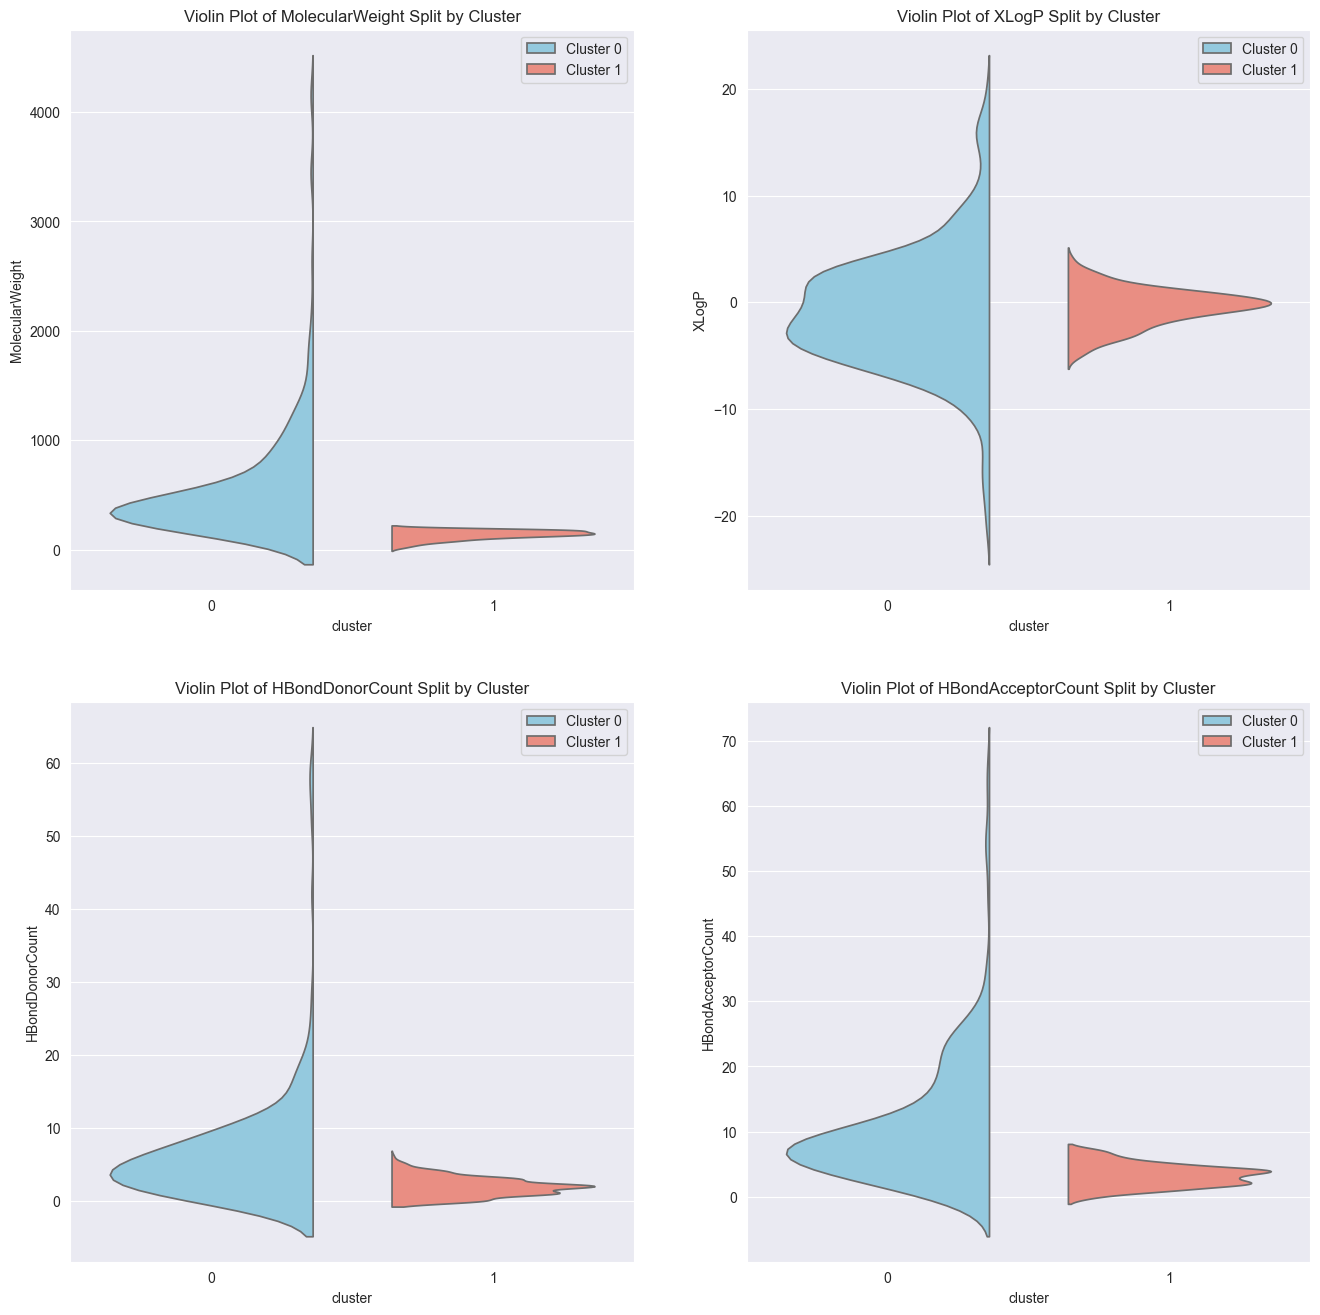

In [27]:
plt.figure(figsize=(16, 16))  # Adjust figure size as needed

# List of columns to plot
columns_to_plot = ['MolecularWeight', 'XLogP', 'HBondDonorCount', 'HBondAcceptorCount']

# Loop through each column
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 2, i)  # Create subplot
    # Plotting split violins for each cluster
    sns.violinplot(data=df, x=df['cluster'], y=column, hue='cluster', split=True, inner=None, palette={0: 'skyblue', 1: 'salmon'}, gap=.1)
    # Set labels and title
    plt.title(f'Violin Plot of {column} Split by Cluster')
    # Add legend
    plt.legend(labels=['Cluster 0', 'Cluster 1'])

plt.show()